<a href="https://colab.research.google.com/github/HoangKhaLe/b-i-t-p-n-i-c-m-i-n/blob/main/BT1_Noicomdien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c44d99ef08b58a281e12fd5055ab3e82640da95a538ce52813441b6198b32792
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


55.66510172143976


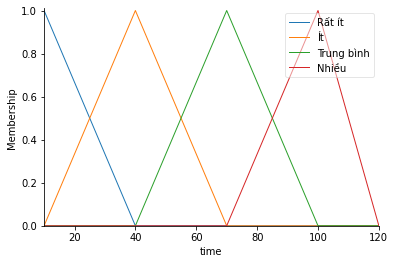

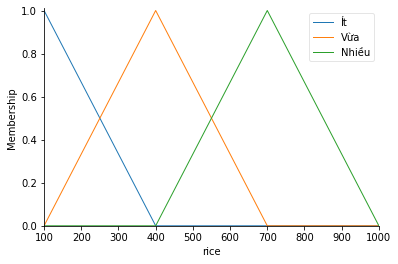

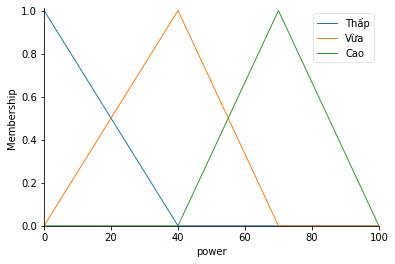

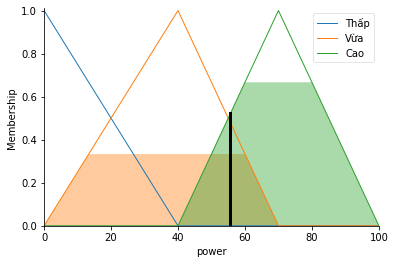

In [3]:
from skfuzzy import control as ctrl
import numpy as np
import skfuzzy as fuzz

time = ctrl.Antecedent(np.arange(10,130,10),'time')
rice = ctrl.Antecedent(np.arange(100,1100,100),'rice')
power = ctrl.Consequent(np.arange(0,110,10),'power')

time['Rất ít'] = fuzz.trimf(time.universe,[10,10,40]) 
time['Ít'] = fuzz.trimf(time.universe,[10,40,70])
time['Trung bình'] = fuzz.trimf(time.universe,[40,70,100])
time['Nhiều'] = fuzz.trimf(time.universe,[70,100,120])
time.view()

rice['Ít'] = fuzz.trimf(rice.universe,[100,100,400]) 
rice['Vừa'] = fuzz.trimf(rice.universe,[100,400,700])
rice['Nhiều'] = fuzz.trimf(rice.universe,[400,700,1000])
rice.view()

power['Thấp'] = fuzz.trimf(power.universe,[0,0,40]) 
power['Vừa'] = fuzz.trimf(power.universe,[0,40,70])
power['Cao'] = fuzz.trimf(power.universe,[40,70,100])
power.view()

rule1 = ctrl.Rule(rice['Ít'] & time['Rất ít'], power['Thấp'])
rule2 = ctrl.Rule(rice['Vừa'] & time['Rất ít'], power['Vừa'])
rule3 = ctrl.Rule(rice['Nhiều'] & time['Rất ít'], power['Cao'])

rule4 = ctrl.Rule(rice['Ít'] & time['Ít'], power['Thấp'])
rule5 = ctrl.Rule(rice['Vừa'] & time['Ít'], power['Vừa'])
rule6 = ctrl.Rule(rice['Nhiều'] & time['Ít'], power['Cao'])

rule7 = ctrl.Rule(rice['Ít'] & time['Trung bình'], power['Thấp'])
rule8 = ctrl.Rule(rice['Vừa'] & time['Trung bình'], power['Thấp'])
rule9 = ctrl.Rule(rice['Nhiều'] & time['Trung bình'], power['Vừa'])

rule10 = ctrl.Rule(rice['Ít'] & time['Nhiều'], power['Thấp'])
rule11 = ctrl.Rule(rice['Vừa'] & time['Nhiều'], power['Thấp'])
rule12 = ctrl.Rule(rice['Nhiều'] & time['Nhiều'], power['Thấp'])

system_ctrl= ctrl.ControlSystem(rules=[rule1, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['rice']=600
system.input['time']=30
system.compute()
print(system.output['power'])
power.view(sim=system)